<a href="https://colab.research.google.com/github/Sandwhaletree/2023.05_Tibame/blob/main/A13_%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%E6%8C%87%E5%B0%8E_%E9%99%B3%E5%AE%87%E6%98%A5/C14_GradientDescent_0809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

您應該對這個檔案中的梯度下降算法和其變體有了深入的理解。整個檔案涵蓋了：

* 數據生成和可視化
* 線性回歸的分析解
* 梯度下降的基本概念和實現
* 梯度下降的不同變體，包括隨機梯度下降和小批量梯度下降
* 梯度下降的可視化和分析

In [3]:
import numpy as np #數值計算
import matplotlib.pyplot as plt #繪圖的常用庫
%matplotlib inline

In [4]:
plt.style.use(['ggplot']) #設置繪圖風格

### Create Data 創建數據

<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation}
\begin{equation} \theta_1= 3 \end{equation}

Add some Gaussian noise to the data添加了高斯噪聲

In [5]:
X = 2 * np.random.rand(100,1) #X 是在 00 到 22 之間隨機生成的100 個數字
y = 4 +3 * X+np.random.randn(100,1)  #是根據 4+3⋅x 的公式計算的，並加上了一些隨機噪

Let's plot our data to check the relation between X and Y

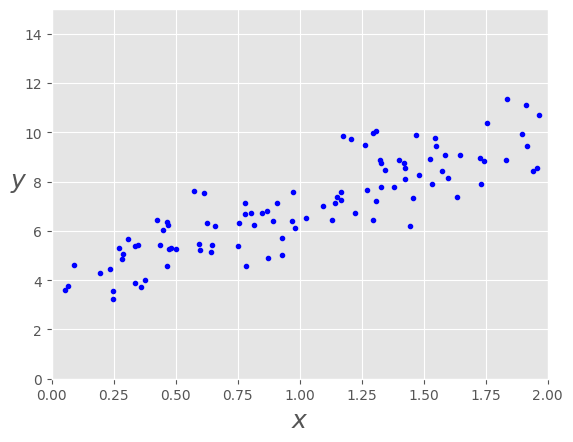

In [6]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

###  Analytical way of Linear Regression 分析線性回歸

In [7]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.86457264]
 [3.11846103]]


<h5>This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data

In [8]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86457264],
       [10.10149469]])

<h5>Let's plot prediction line with calculated:theta 預測與繪圖

(0.0, 2.0, 0.0, 15.0)

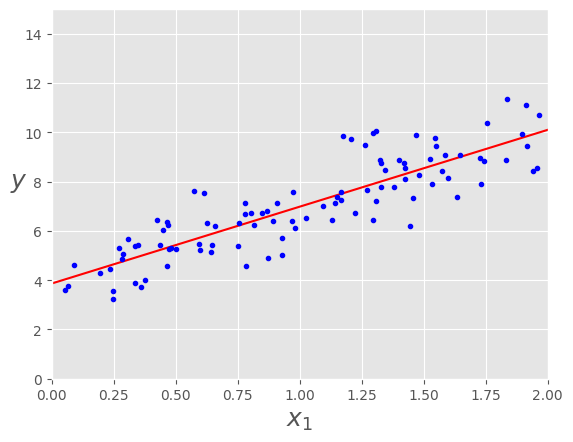

In [9]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


### Gradient Descent 梯度下降的可視化
* 使用 plot_GD 函數繪製了不同迭代次數和學習速率下梯度下降的效果。這個函數將迭代過程中的預測線和成本變化可視化，有助於理解梯度下降的工作原理

#### Cost Function & Gradients 定義了成本函數J(θ)，這是一個衡量模型預測與實際值之間差異的函數

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [10]:

def  cal_cost(theta,X,y):
    '''

    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))

    where:
        j is the no of features

    函數 cal_cost 用於計算給定X 和y 的成本。輸入包括θ（參數向量）、X（特徵矩陣）、y（實際值）。
    這個函數是梯度下降算法中的一個關鍵部分，用於評估模型的性能
    cal_cost 的具體實現，計算預測值與實際值之間的平方誤差和
    '''

    m = len(y)

    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [24]:
#梯度的計算，梯度是成本函數相對於模型參數的導數，用於更新模型參數
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    函數 gradient_descent 實現了梯度下降算法。輸入包括X（帶偏置單位的特徵矩陣）、y（目標向量）、θ（參數向量）、學習速率和迭代次數。
    在每次迭代中，算法計算預測值、計算梯度，並更新θ。
    函數返回最終的 θ、成本歷史和 θ 歷史。成本歷史和 θ 歷史可用於分析算法的收斂過程
    這些步驟完成了梯度下降算法的核心部分，提供了一個通用的方法來最小化線性回歸模型的成本函數
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):

        prediction = np.dot(X,theta)

        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history, theta_history




<h3> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [12]:
#梯度下降的應用
'''
設學習速率（lr）和迭代次數（n_iter），並隨機初始化
調用之前定義的 gradient_descent 函數進行梯度下降，並打印最終的θ和成本。
繪製成本歷史隨迭代次數的變化圖。
'''
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.763,
Theta1:          3.206
Final cost/MSE:  4577.403


<h3> Let's plot the cost history over iterations

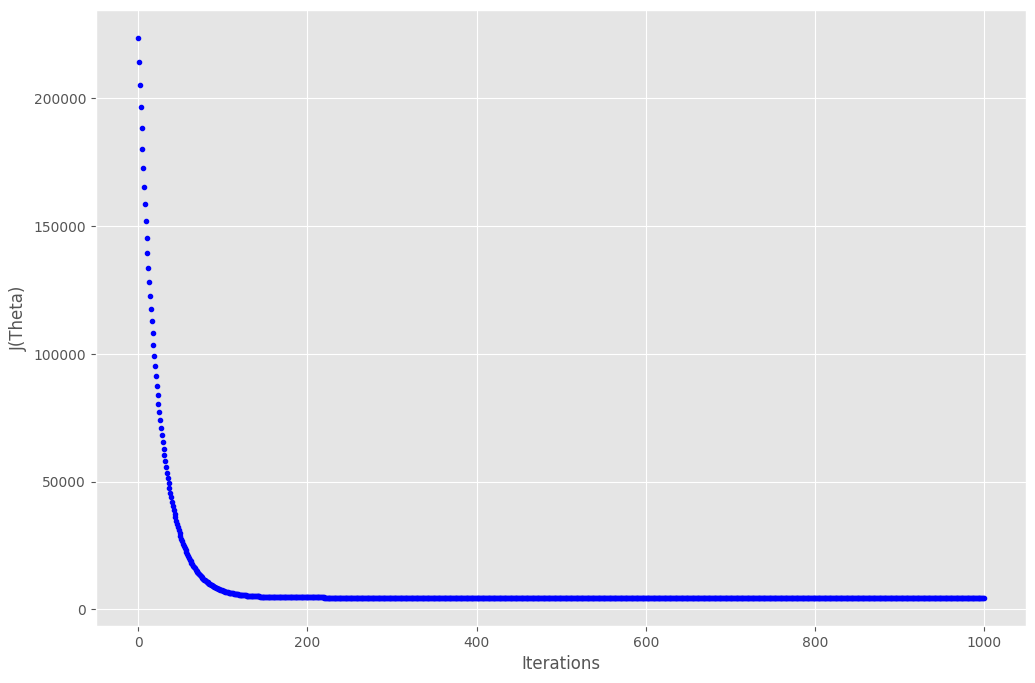

In [13]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

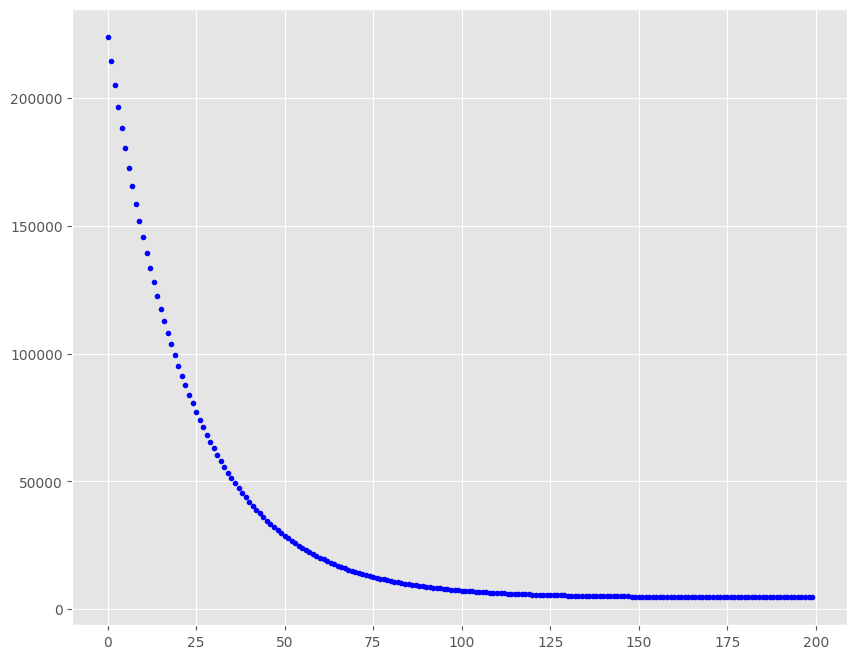

In [14]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

### It would be great to see the effect of different learning rates and iterations together

### Let us  build a function which can show the effects together and also show how gradient decent actually is working

In [15]:
#梯度下降的可視化
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot
     定義了 plot_GD 函數，用於可視化梯度下降的過程。
     這個函數在每個迭代中繪製預測線，並顯示成本的變化

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

### Plot the graphs for different iterations and learning rates combination

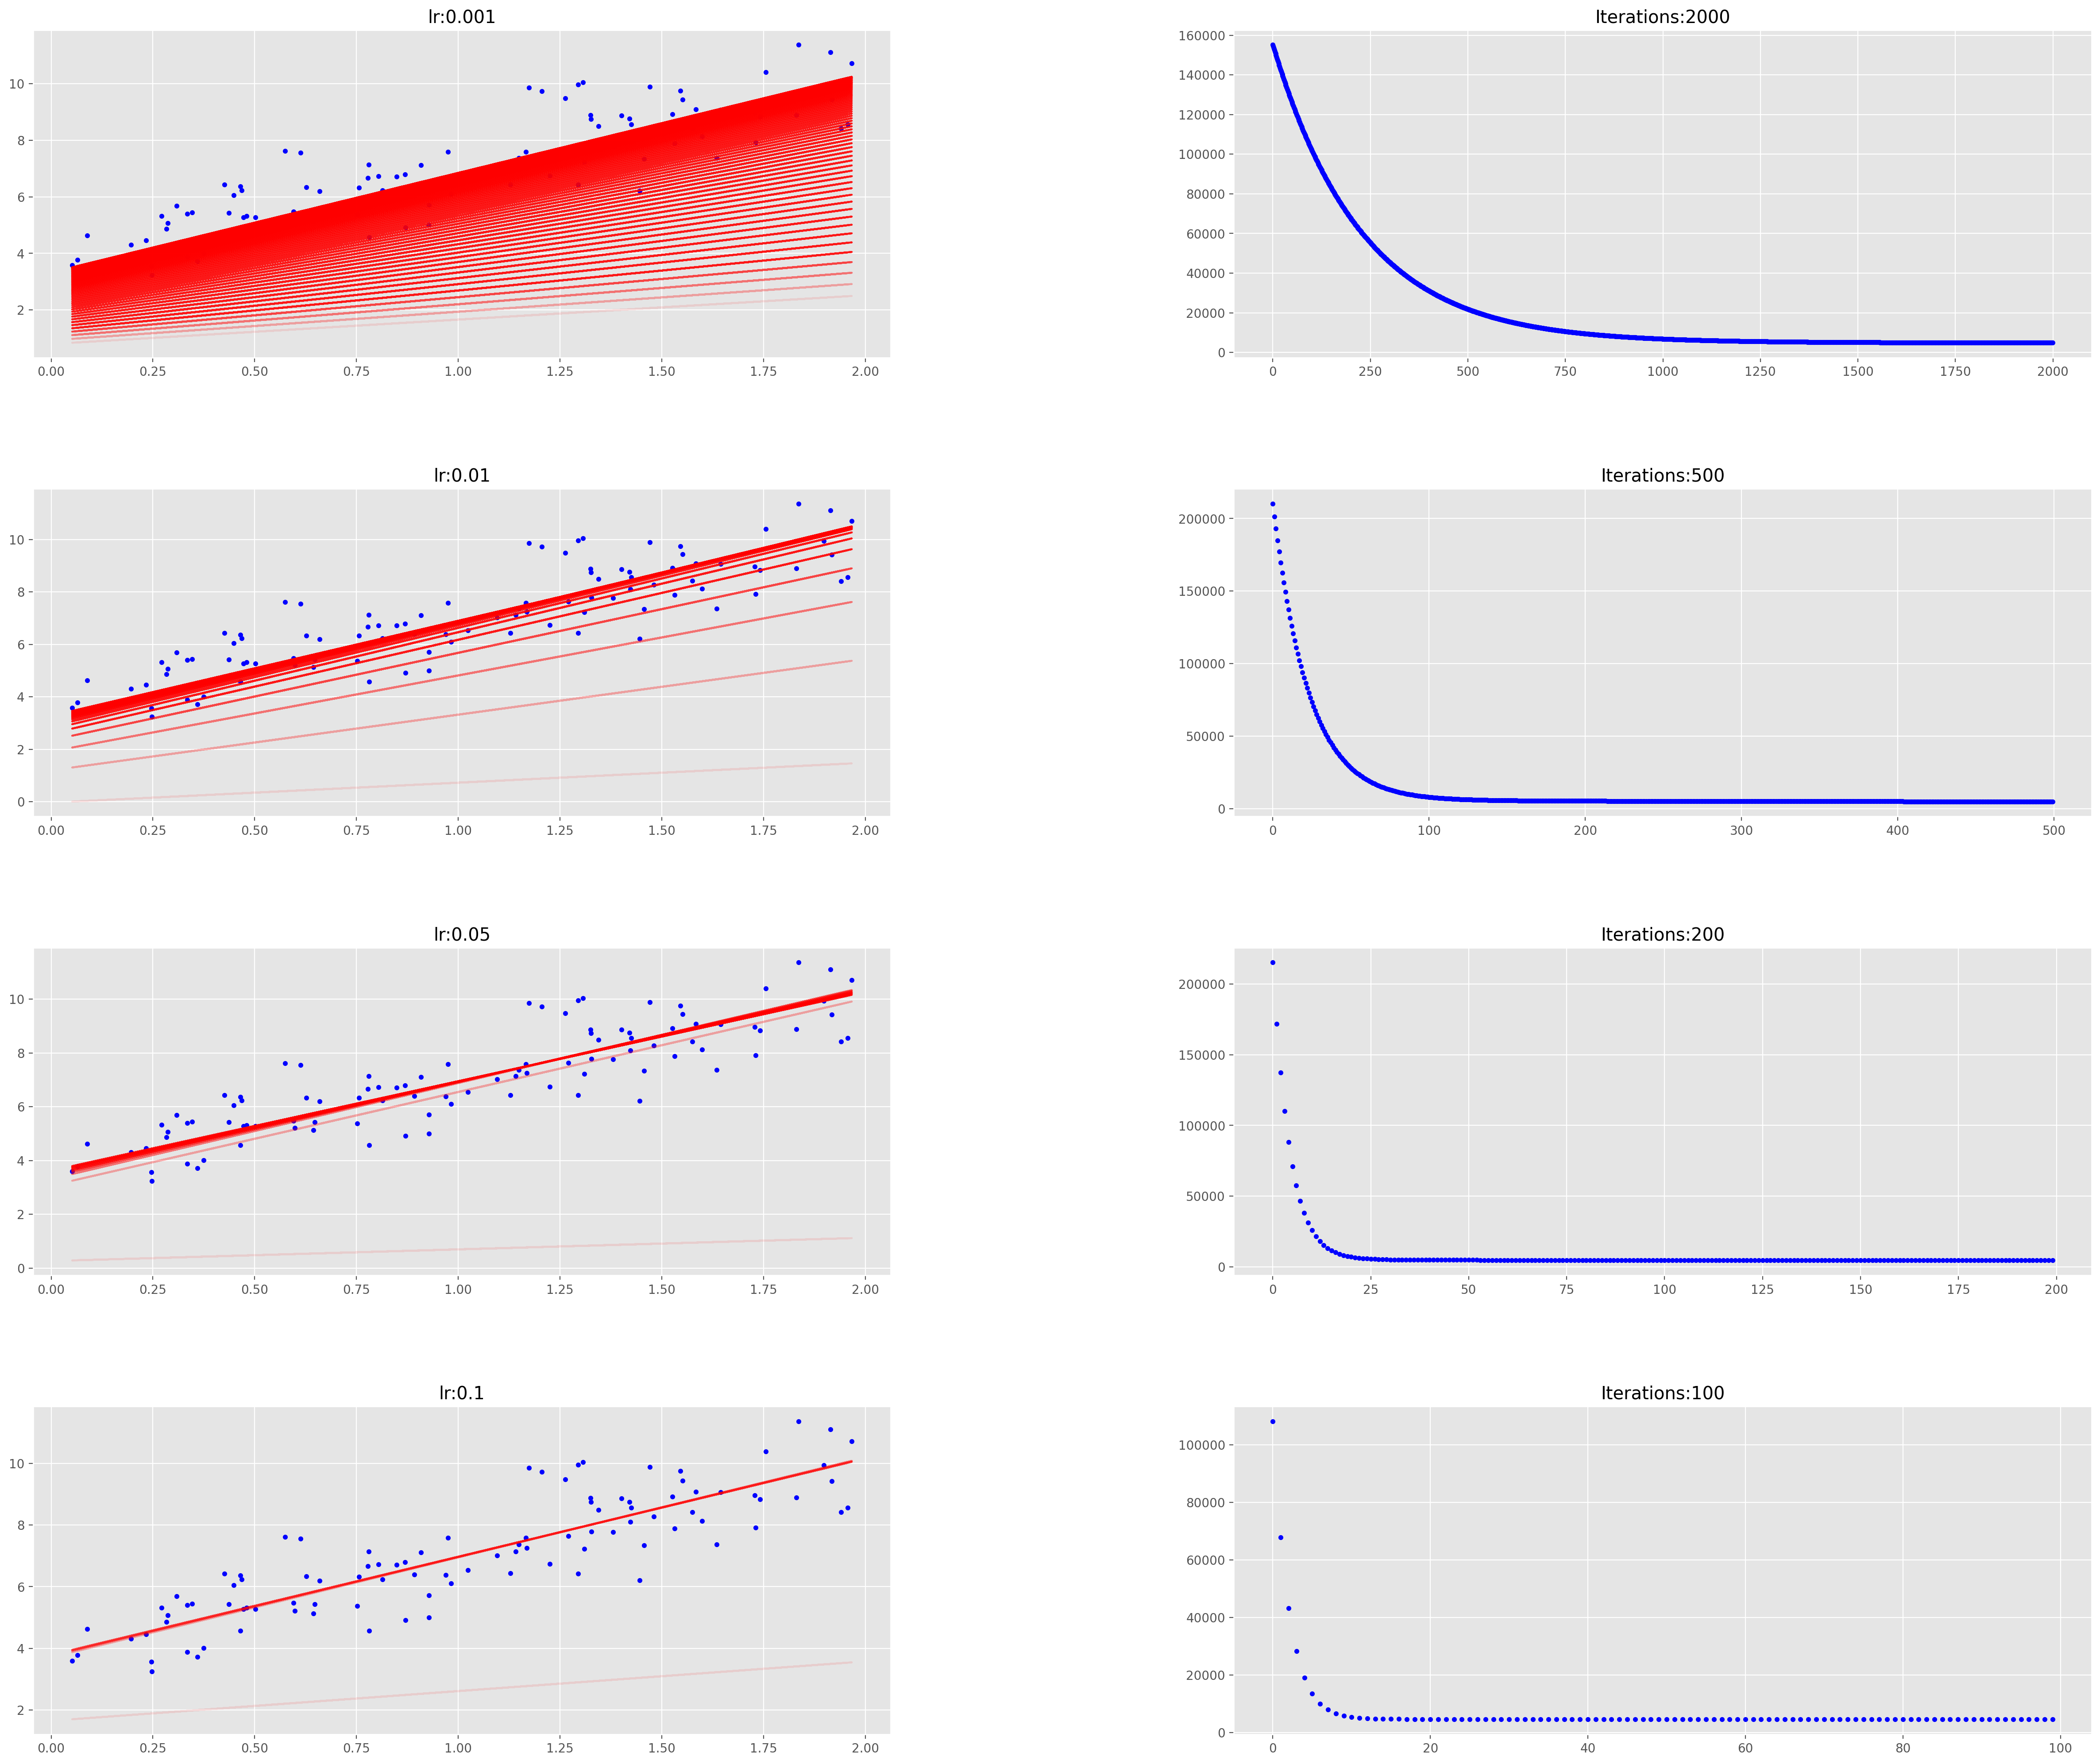

In [16]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)


<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

## You can always plot Indiviual graphs to zoom in

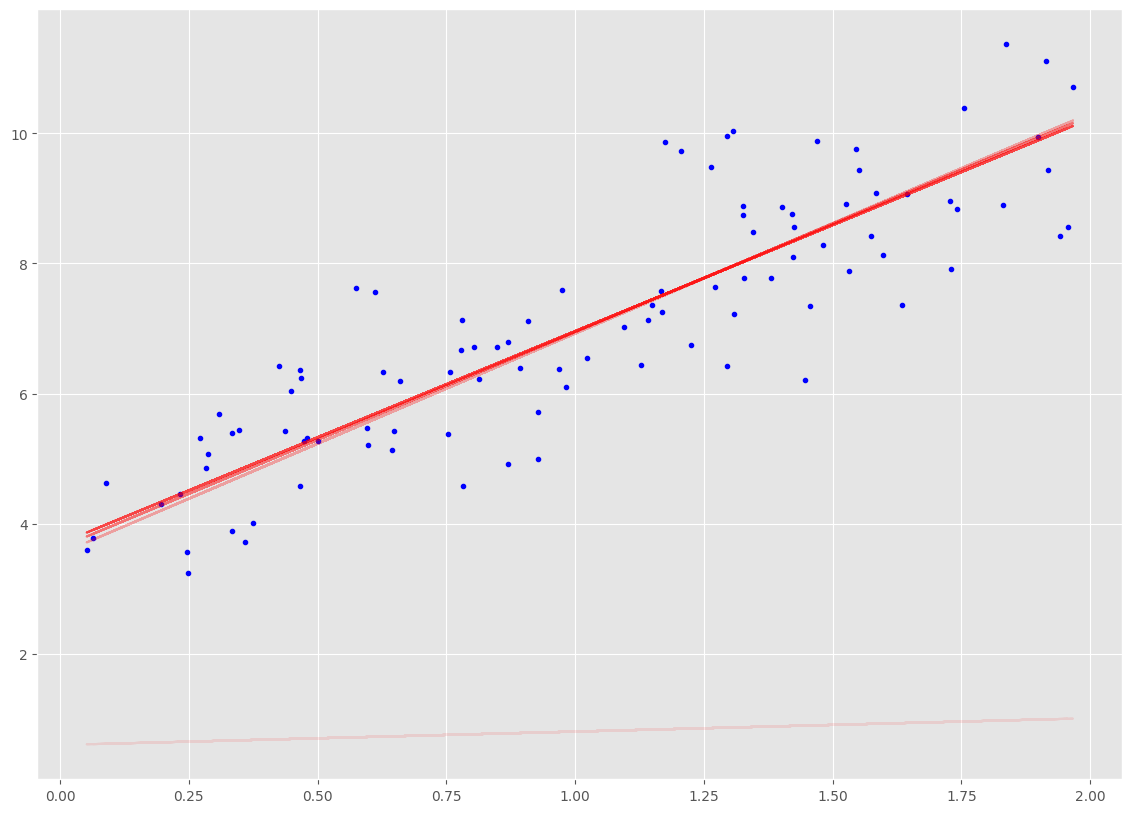

In [17]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# Stochastic Gradient Descent 隨機梯度下降



In [18]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    定義了 stocashtic_gradient_descent 函數，實現了隨機梯度下降算法。與普通梯度下降不同，SGD 在每次迭代中隨機選擇一個訓練樣本來更新θ。
    這種方法可以更快地收斂，但可能會更加不穩定。
    這部分程式碼也包括了使用 SGD 的示例，設置了學習速率和迭代次數，並繪製了成本隨迭代次數的變化圖
    '''
    m = len(y)
    cost_history = np.zeros(iterations)


    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost

    return theta, cost_history

In [19]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.770,
Theta1:          3.197
Final cost/MSE:  50.914


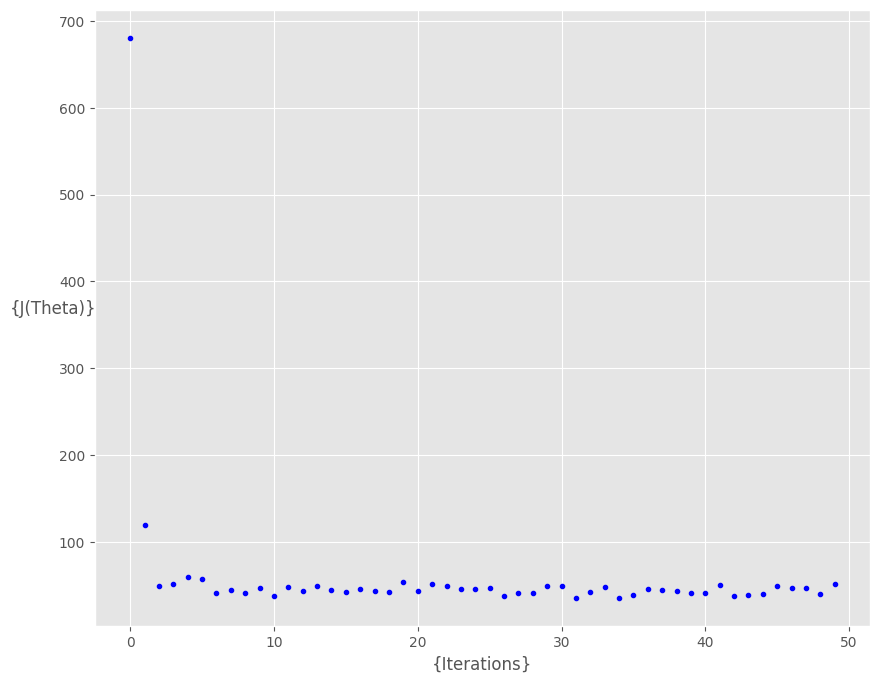

In [20]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent 小批量梯度下降

In [21]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    這是梯度下降的另一個變體，每次迭代使用一小批（batch）訓練樣本來更新θ。
    通過 minibatch_gradient_descent 函數的實現，可以在每次迭代中選擇一個隨機的小批量樣本
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)

    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)),X_i]

            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost

    return theta, cost_history

In [22]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.867,
Theta1:          3.116
Final cost/MSE:  912.005


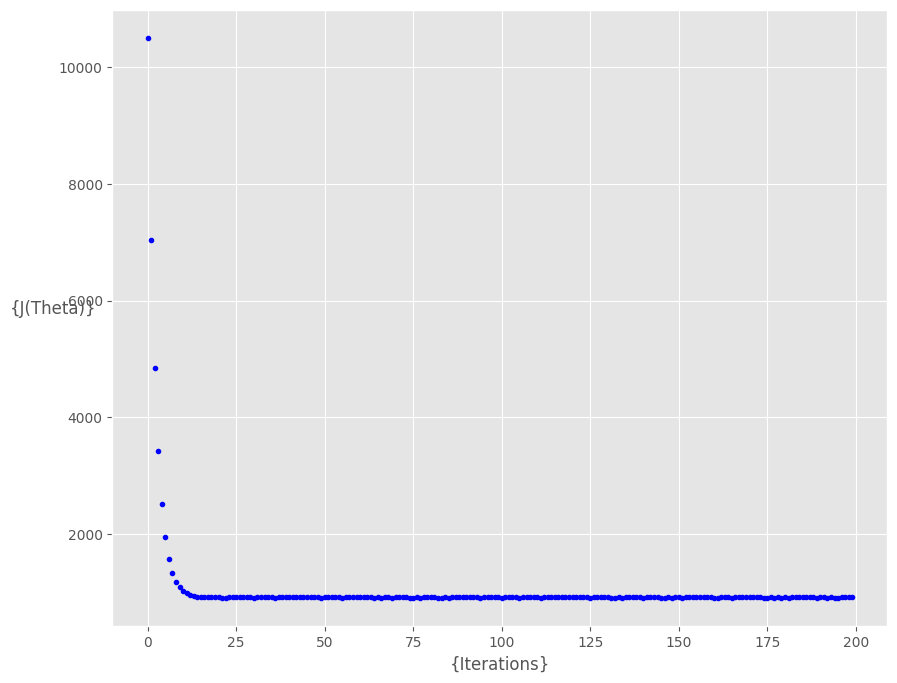

In [23]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')